<a href="https://colab.research.google.com/github/jgabrielg99/Python/blob/main/AllLife%20Bank%20Personal%20Loan%20Campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 27.5 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.7.1 which is incompatible.
plotnine 0.14.5 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 25.2.1 requires pandas<2.2.

In [2]:
# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To perform statistical analysis
import scipy.stats as stats

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    make_scorer,
)


## Loading the dataset

In [3]:
#import google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#load in the data set, create a copy, and check first 10 rows
data = pd.read_csv('/content/drive/MyDrive/AIML Course/Files/Loan_Modelling.csv')
df = data.copy()
df.head(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [5]:
#create lists containing categorical variables and numerical variables
cat_cols = ['ZIPCode', 'Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']
num_cols = ['Age', 'Experience', 'Income', 'Family', 'CCAvg',  'Mortgage']

## Data Overview

* Observations
* Sanity checks

In [6]:
#check the shape of the dataset
df.shape

(5000, 14)

There are 5000 rows and 14 columns in this dataset

In [7]:
#check data types of each column in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


* There don't appear to be any missing values
* All of the data types look correct; we will want to convert ZIP to a category

In [8]:
#check the number of unique values in the ID column
df['ID'].nunique()

5000

In [9]:
#drop ID column from dataset
df.drop(['ID'], axis=1, inplace=True)

* There are 5000 unique ID values, so we can drop this from the data set as it proves no real value to the model

In [10]:
#check for missing values
df.isnull().sum()

,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0
Securities_Account,0


* No missing values in any column

In [11]:
#check for duplicated values
df.duplicated().sum()

np.int64(0)

* No duplicated rows in the dataset

In [12]:
#get statistical summary of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


* There are negative values in the Experience column that will require further attention
* At least 50% of the data set does not have a mortgage; this will likely result in a large number of outliers, but these values are most likely correct
* ZIP Code, Personal Loan, Securities, CD, Online, and Credit Card are all categorical columns

In [13]:
#check the unique values in the Experience column
df['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

* There are values of -1, -2, and -3 in the Experience column
* We will convert them to their absolute value

In [14]:
#find the number of Experience values below 0
df.loc[df['Experience']<0].shape[0]

52

In [15]:
#replace negative Experience values with absolute value
replaceStruct = {'Experience': {-1: 1, -2: 2, -3: 3}}
df.replace(replaceStruct, inplace=True)

* The negatives values in the Experience column are now all positive

In [16]:
#sorting ZIP Code by first two digits, then converting the column to a category
df['ZIPCode'] = df['ZIPCode'].astype(str)
df['ZIPCode'] = df['ZIPCode'].str[0:2]

df['ZIPCode'] = df['ZIPCode'].astype('category')

In [17]:
df['ZIPCode'].nunique()

7

*  The first two digit of US ZIP Codes can be used to identify specific geological regions
  * By sorting by the first two digits, there are only 7 unique ZIP Code values, and ZIP Code is now converted to a categorical column

---







In [18]:
#checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   int64   
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   int64   
 9   Securities_Account  5000 non-null   int64   
 10  CD_Account          5000 non-null   int64   
 11  Online              5000 non-null   int64   
 12  CreditCard          5000 non-null   int64   
dtypes: category(1), float64(1), int64(11)
memory usage: 474.1 KB


## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

In [19]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [20]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [21]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [22]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

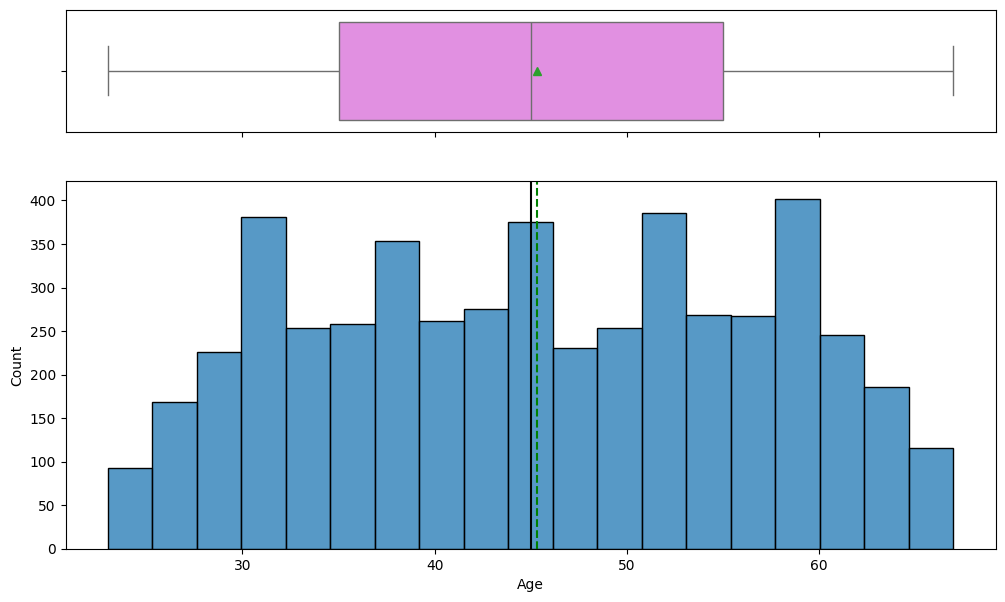

In [23]:
#view distribution on Age
histogram_boxplot(df, 'Age')

* Standard distribution and multimodal

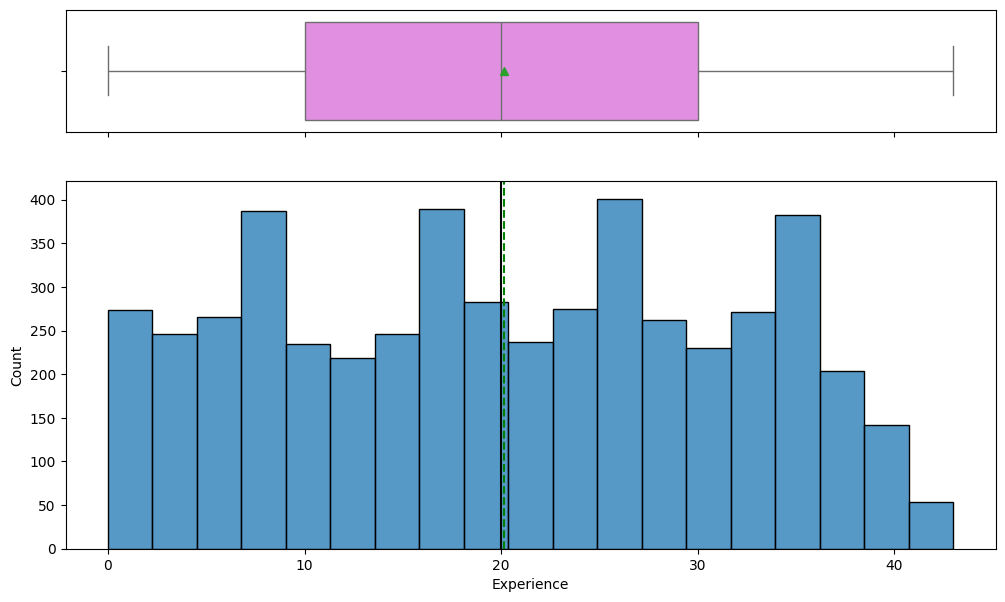

In [24]:
#view distribution of Experience
histogram_boxplot(df, 'Experience')

* Age and Experience appear very closely correlated
  * It may be beneficial to drop on so these values are weighed too heavily

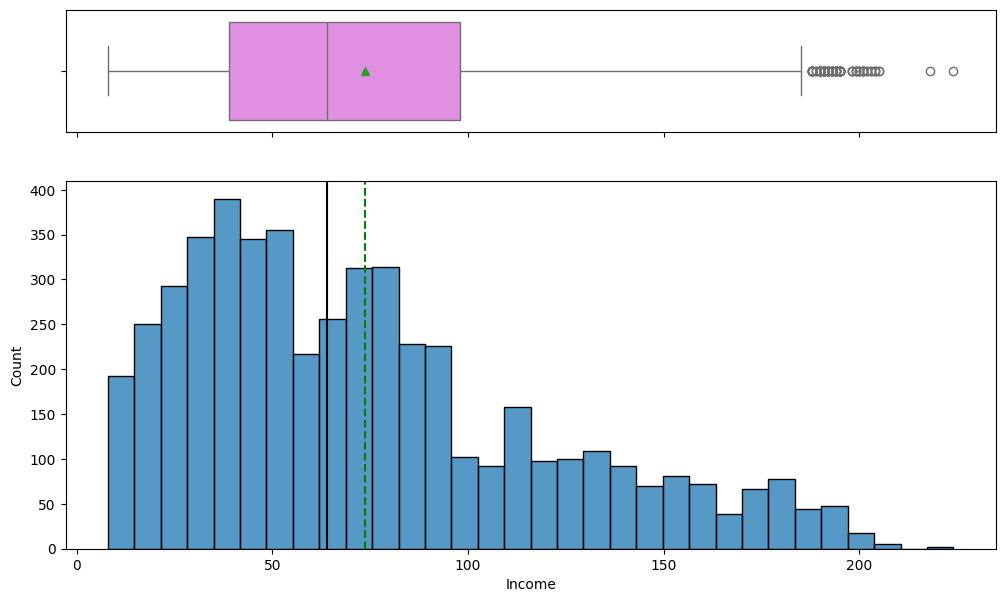

In [25]:
#view distribution on Income
histogram_boxplot(df, 'Income')

* As expected, income is right-skewed
* There are several outliers, but these likely accurate values

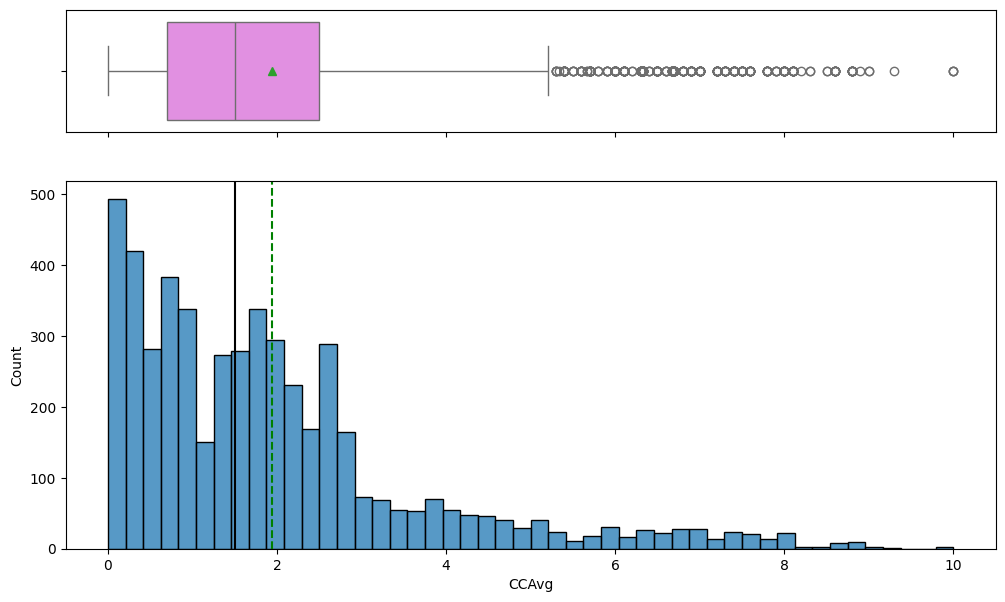

In [26]:
#view distribution on Credit Card Average
histogram_boxplot(df, 'CCAvg')

* Heavily right-skewed
* Outliers are likely accurate values

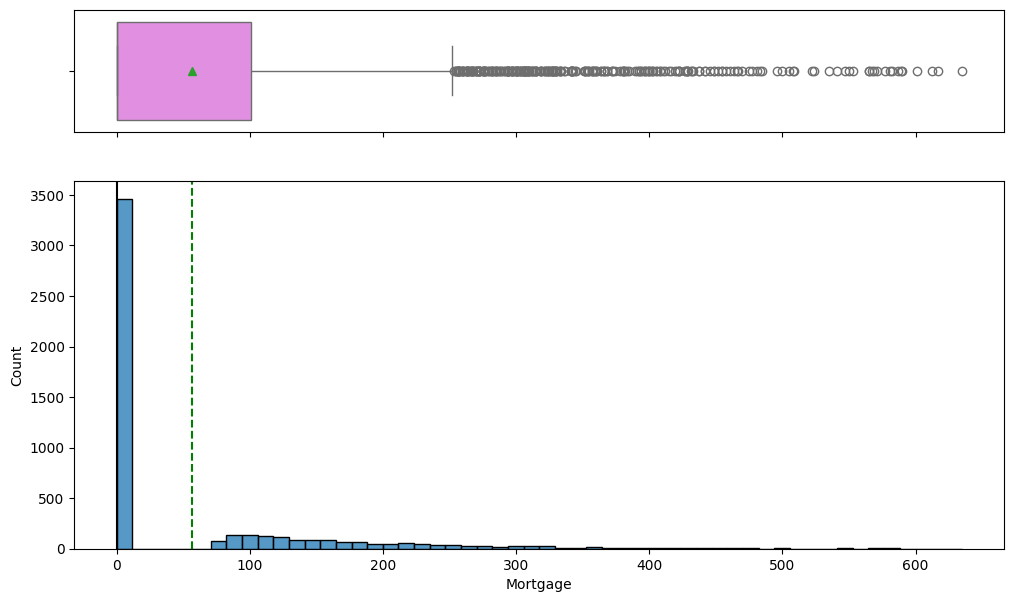

In [27]:
#view distribution on Mortgage
histogram_boxplot(df, 'Mortgage')

* Over 50% of the data set does not have a mortgage
  * Because of this, most of the customers that do have a mortgage are being shown as outliers, but these do appear to be accurate values
* No outlier treatment is required

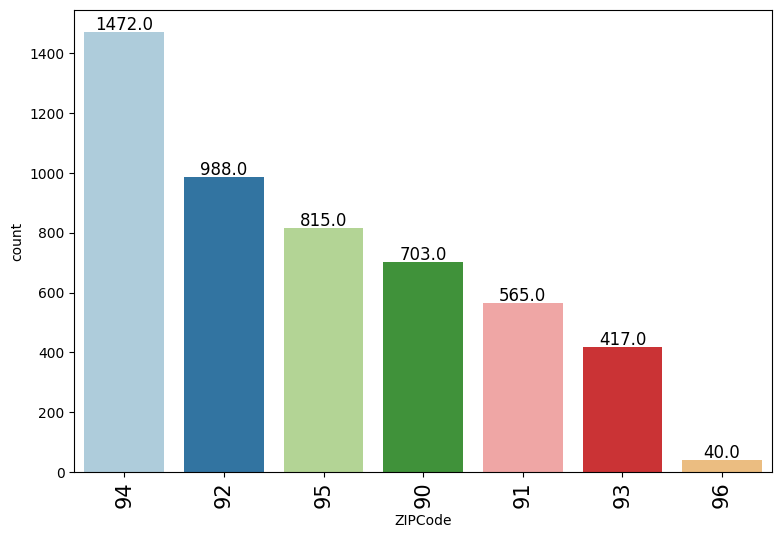

In [28]:
#view distribution on ZIP Code
labeled_barplot(df, 'ZIPCode')

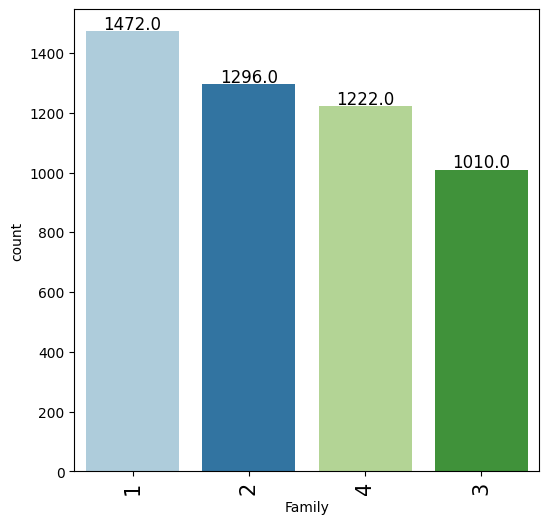

In [29]:
#view distribution on Family
labeled_barplot(df, 'Family')

* Distribution appears fairly even; a family size of 1 is the most common

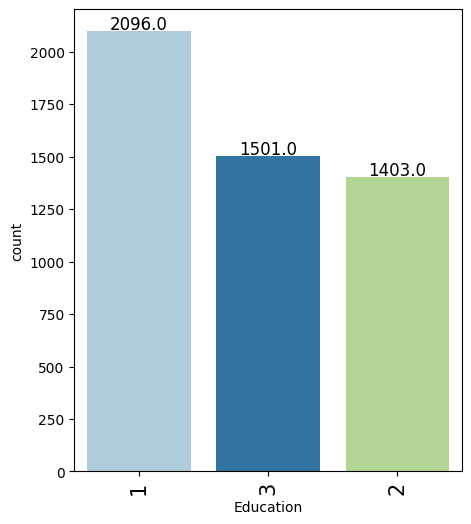

In [30]:
#view distribution on Education
labeled_barplot(df, 'Education')

* Most customers hold an undergraduate degree
* Approximately the same number of customers hold graduate or professional degrees

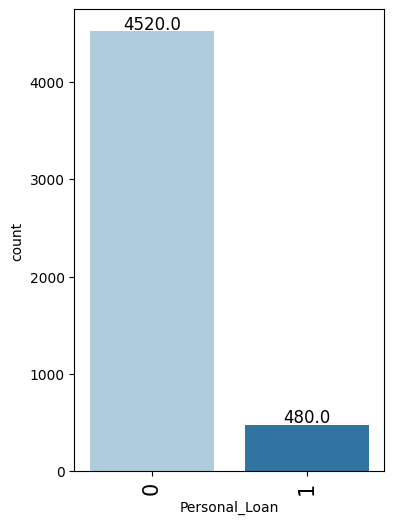

In [31]:
#view distribution on Personal Loan
labeled_barplot(df, 'Personal_Loan')

In [32]:
df[df['Personal_Loan']==1].shape[0]/df.shape[0]*100

9.6

* Significantly fewer customers took out a personal loan than did not
  * Only 9.6% of customers took out a personal loan during the last campaign

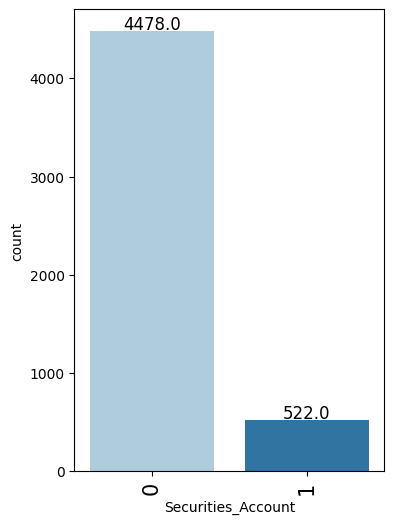

In [33]:
#view distribution on Securities Account
labeled_barplot(df, 'Securities_Account')

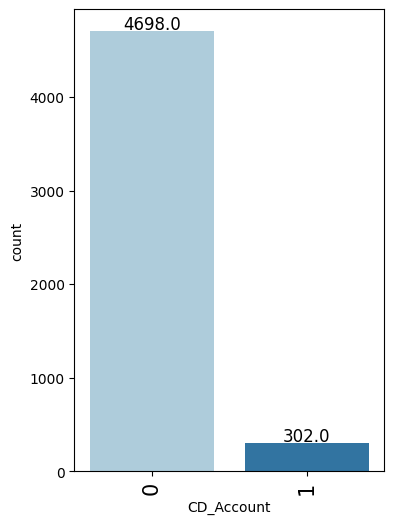

In [34]:
#view distribution on CD Account
labeled_barplot(df, 'CD_Account')

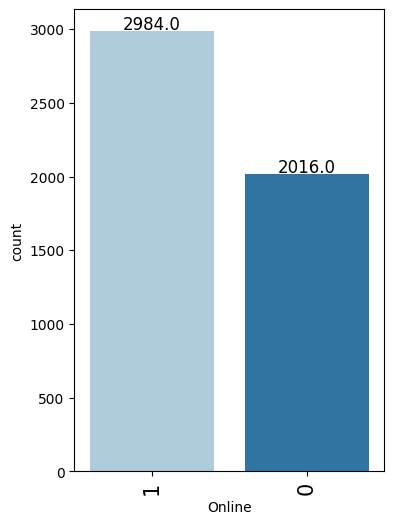

In [35]:
#view distribution on Online usage
labeled_barplot(df, 'Online')

* Approximately 3000 customer do use online banking facilities

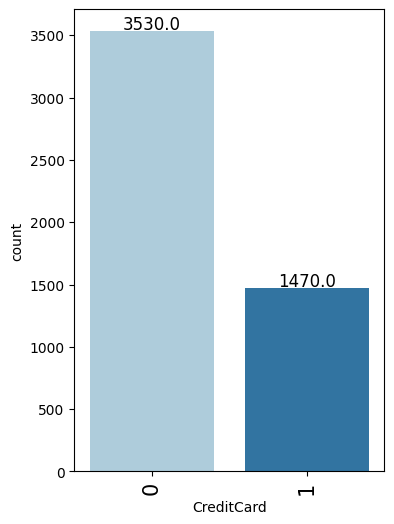

In [36]:
#view distribution on Credit Cards
labeled_barplot(df, 'CreditCard')

In [37]:
df[df['CreditCard']==1].shape[0]/df.shape[0]*100

29.4

* 1470 customers have Credit Cards
   * This makes up 29.4% of the data set




In [38]:
df.columns

Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

Personal_Loan     0    1   All
ZIPCode                       
All            4520  480  5000
94             1334  138  1472
92              894   94   988
95              735   80   815
90              636   67   703
91              510   55   565
93              374   43   417
96               37    3    40
------------------------------------------------------------------------------------------------------------------------


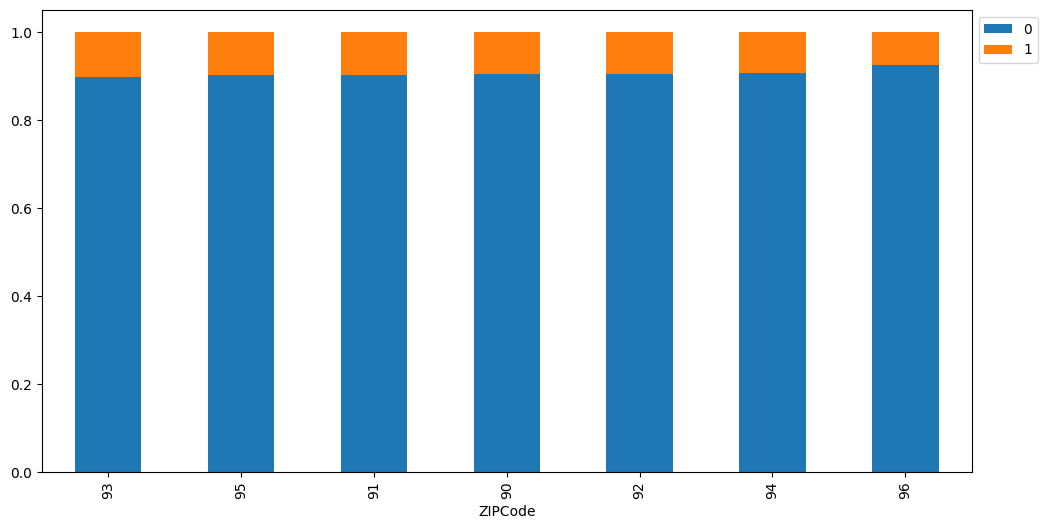

In [39]:
#view relationship between Personal Loan and Zip Code
stacked_barplot(df, 'ZIPCode', 'Personal_Loan')

* There doesn't appear to be much correlation between Personal loan and ZIP Code

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


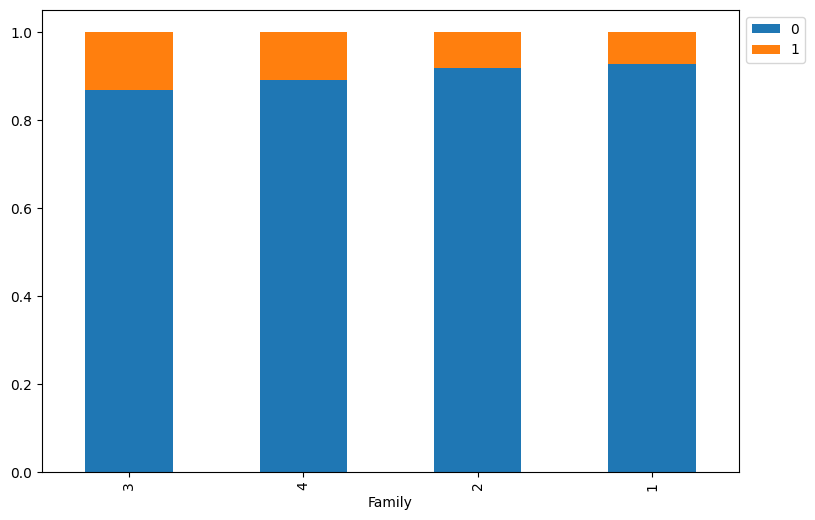

In [40]:
#view relationship between Personal Loan and Family Size
stacked_barplot(df, 'Family', 'Personal_Loan')

* Larger family sizes are more likely to take out a personal loan

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


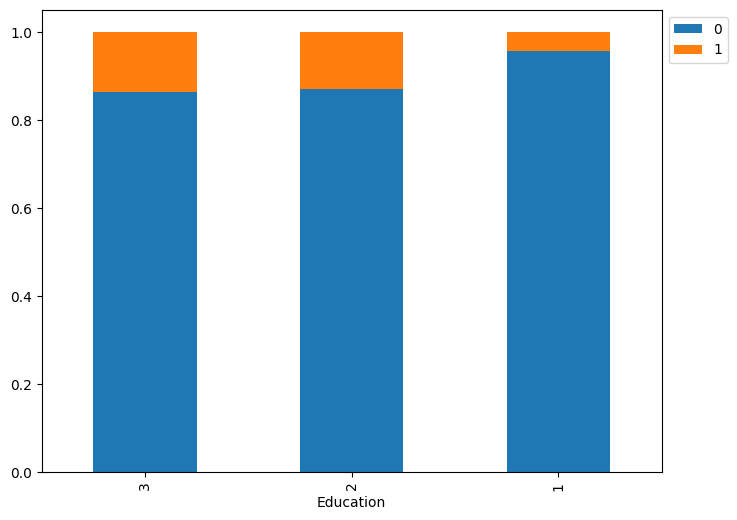

In [41]:
#view relationship between Personal Loan and Education
stacked_barplot(df, 'Education', 'Personal_Loan')

* Customers that have a Graduate Degree and/or an Advanced/Professional degree are twice as likely to have taken out a personal loan than a customer with only an undergraduate degree

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


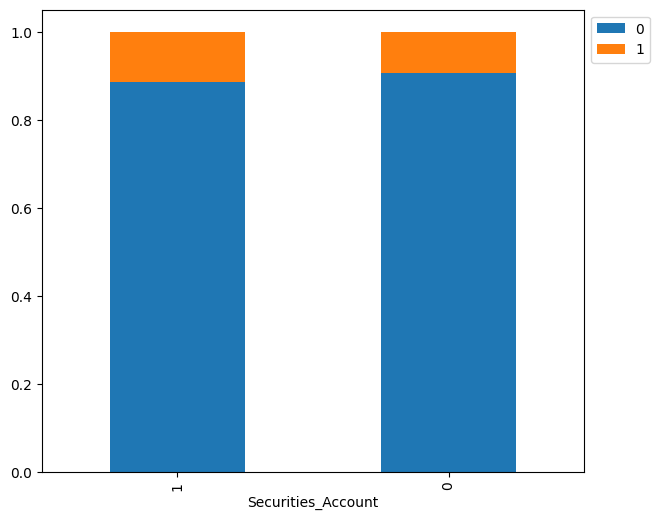

In [42]:
#view relationship between Personal Loan and Securities Accounts
stacked_barplot(df, 'Securities_Account', 'Personal_Loan')

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


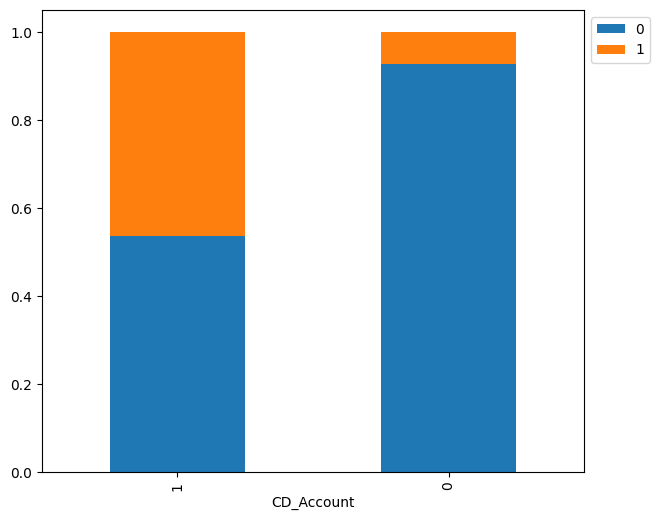

In [43]:
#view relationship between Personal Loan and CD Accounts
stacked_barplot(df, 'CD_Account', 'Personal_Loan')

* Customers with a CD Account are significantly more likely to take out a personal loan

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


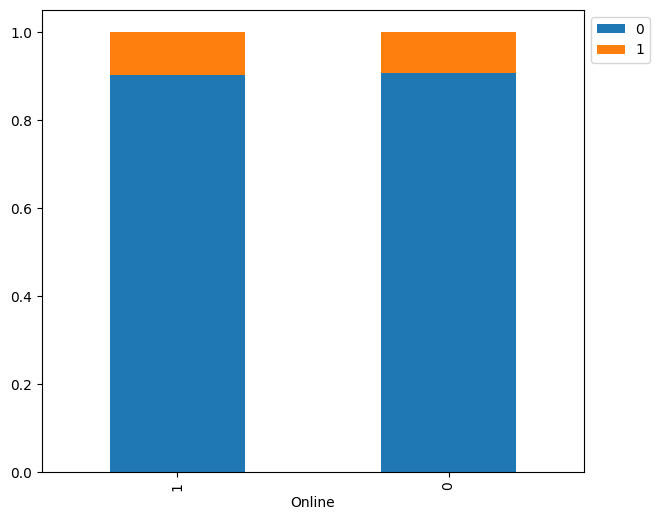

In [44]:
#view relationship between Personal Loan and Online usage
stacked_barplot(df, 'Online', 'Personal_Loan')

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


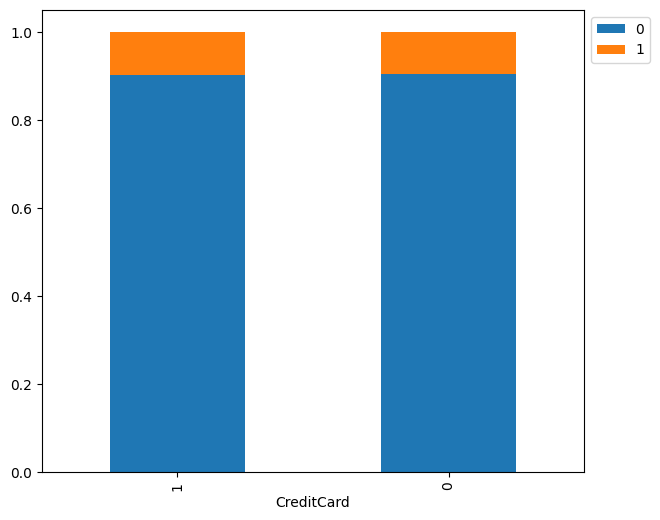

In [45]:
#view relationship between Personal Loan and Credit Cards
stacked_barplot(df, 'CreditCard', 'Personal_Loan')

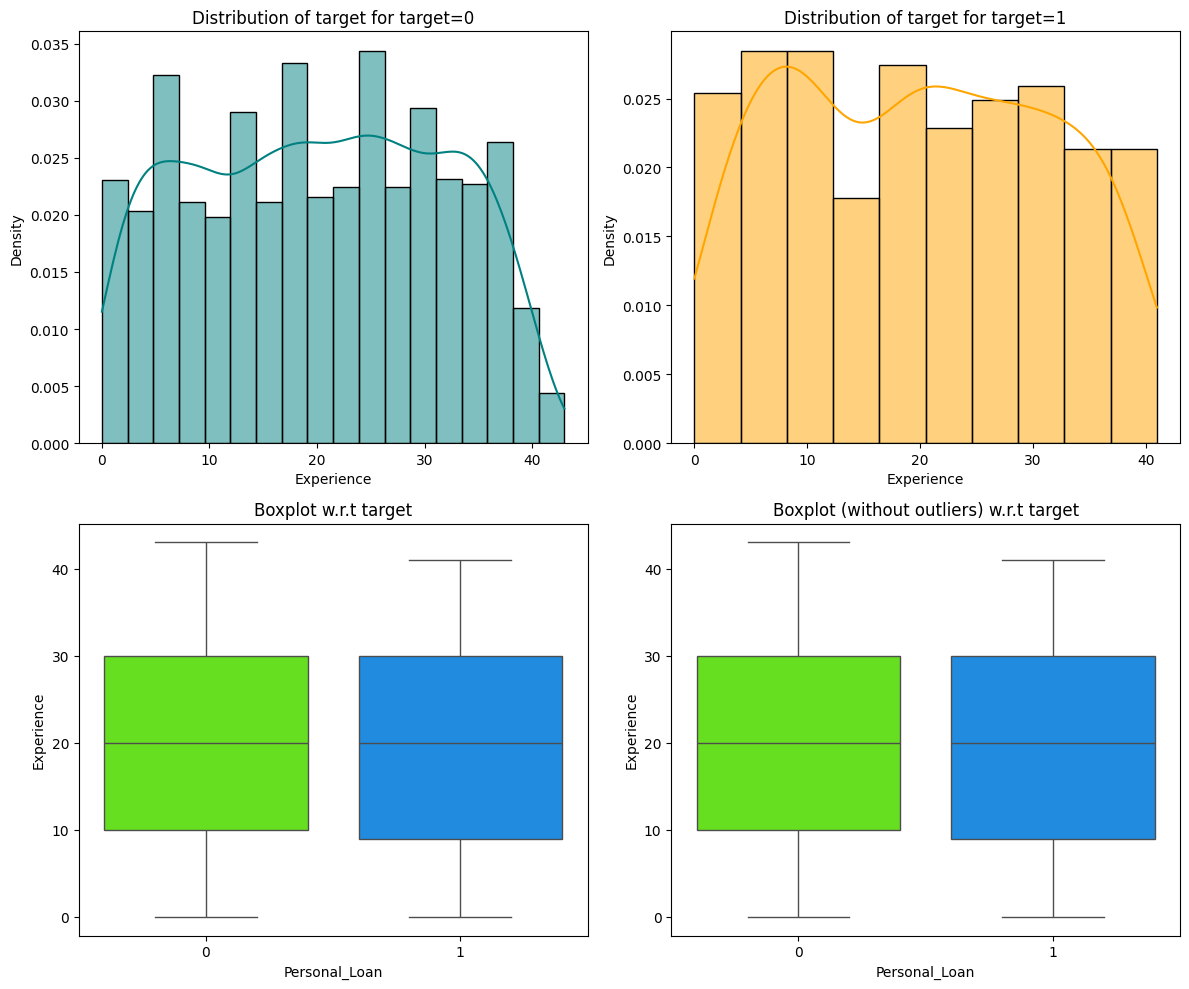

In [46]:
#view relationship between Personal Loan and Experience
distribution_plot_wrt_target(df, 'Experience', 'Personal_Loan')

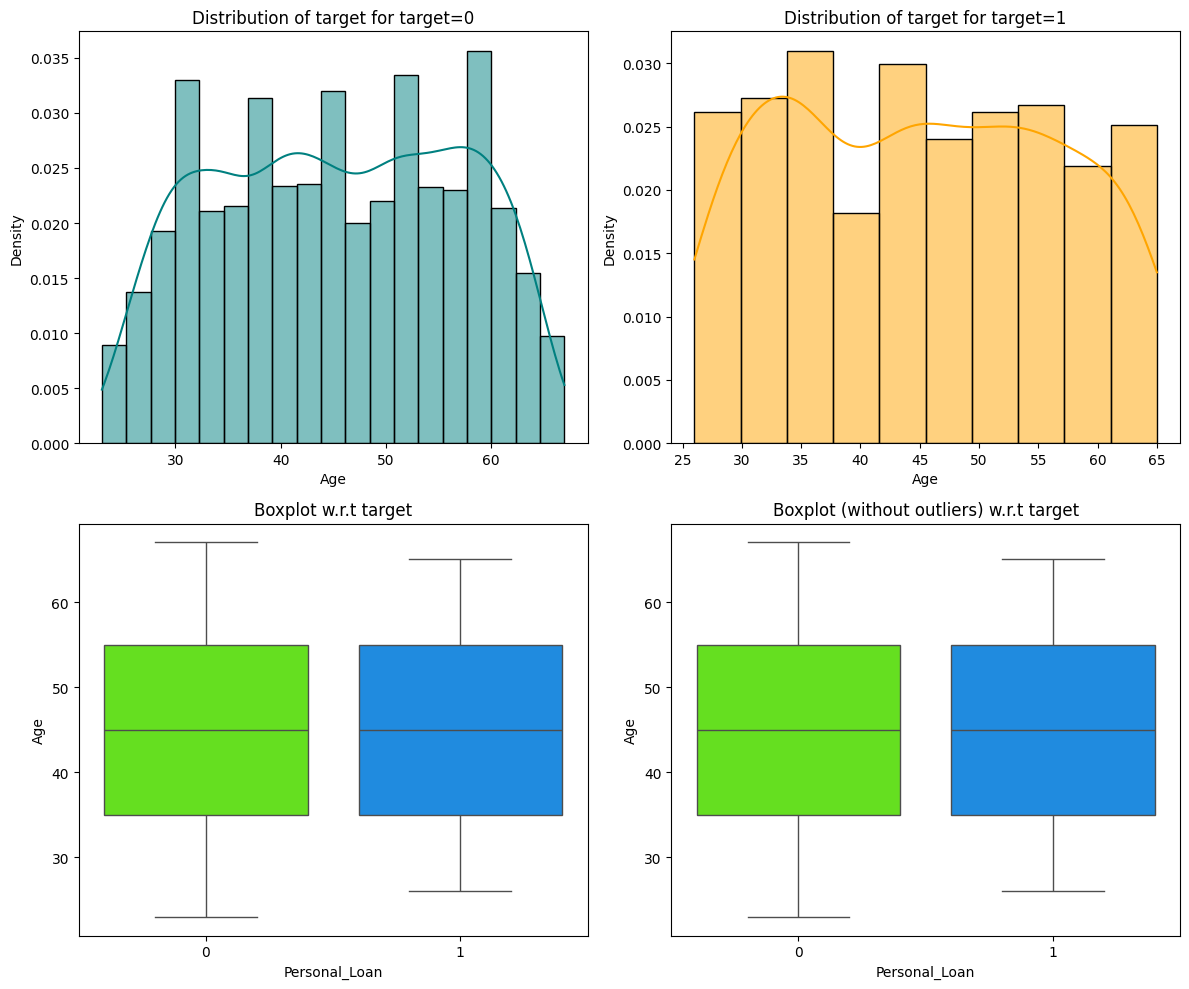

In [47]:
#view relationship between Personal Loan and Age
distribution_plot_wrt_target(df, 'Age', 'Personal_Loan')

* There appears to be a normal distribution between Age and Personal Loan. The data is multimodal and non-skewed
* Customers under the age of 30 and above the age of 60 are less likely to be interested in a loan

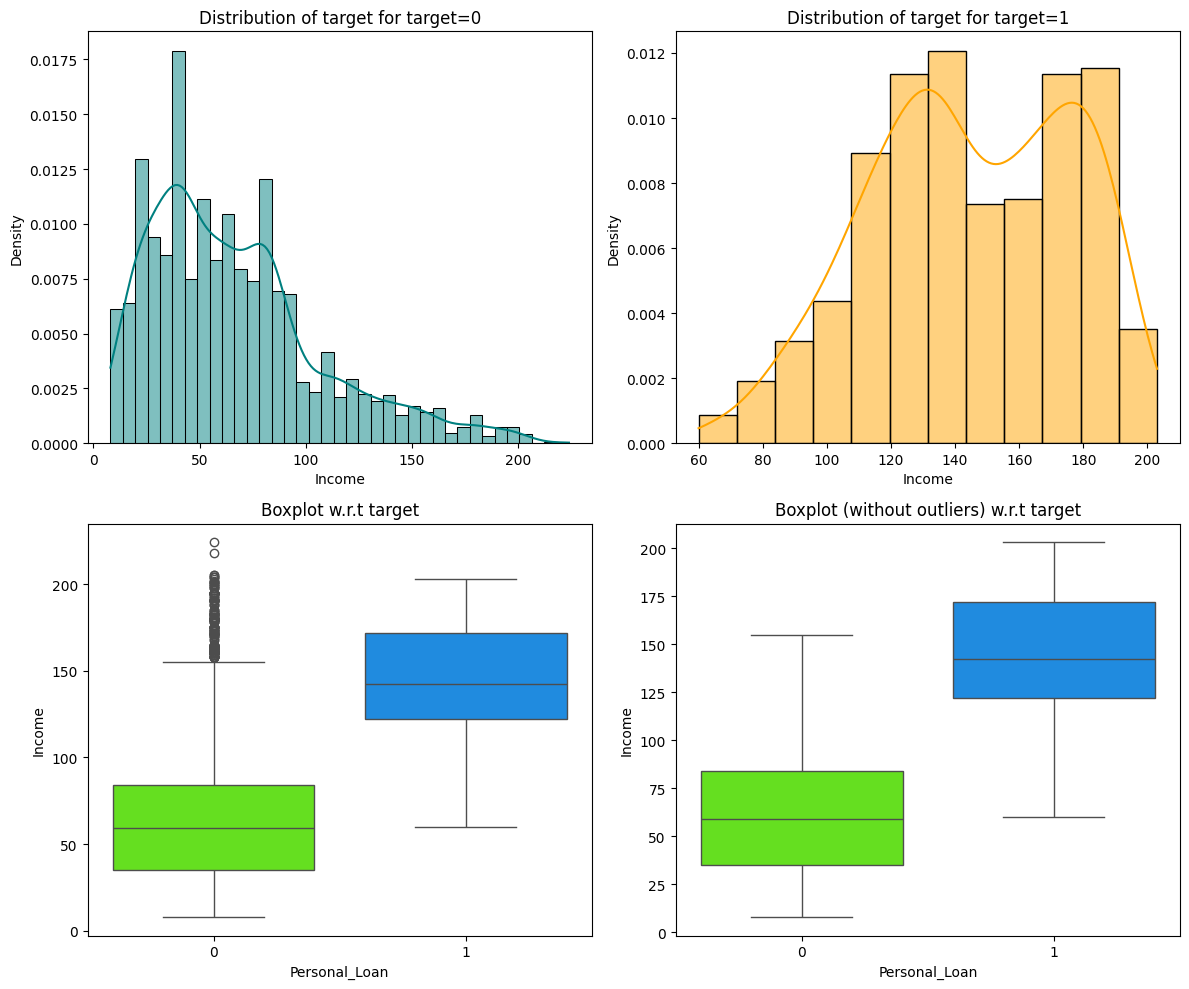

In [48]:
#view relationship between Personal Loan and Income
distribution_plot_wrt_target(df, 'Income', 'Personal_Loan')

* Of the customers that do take out a personal loan, most earn between 100k and 200k annually

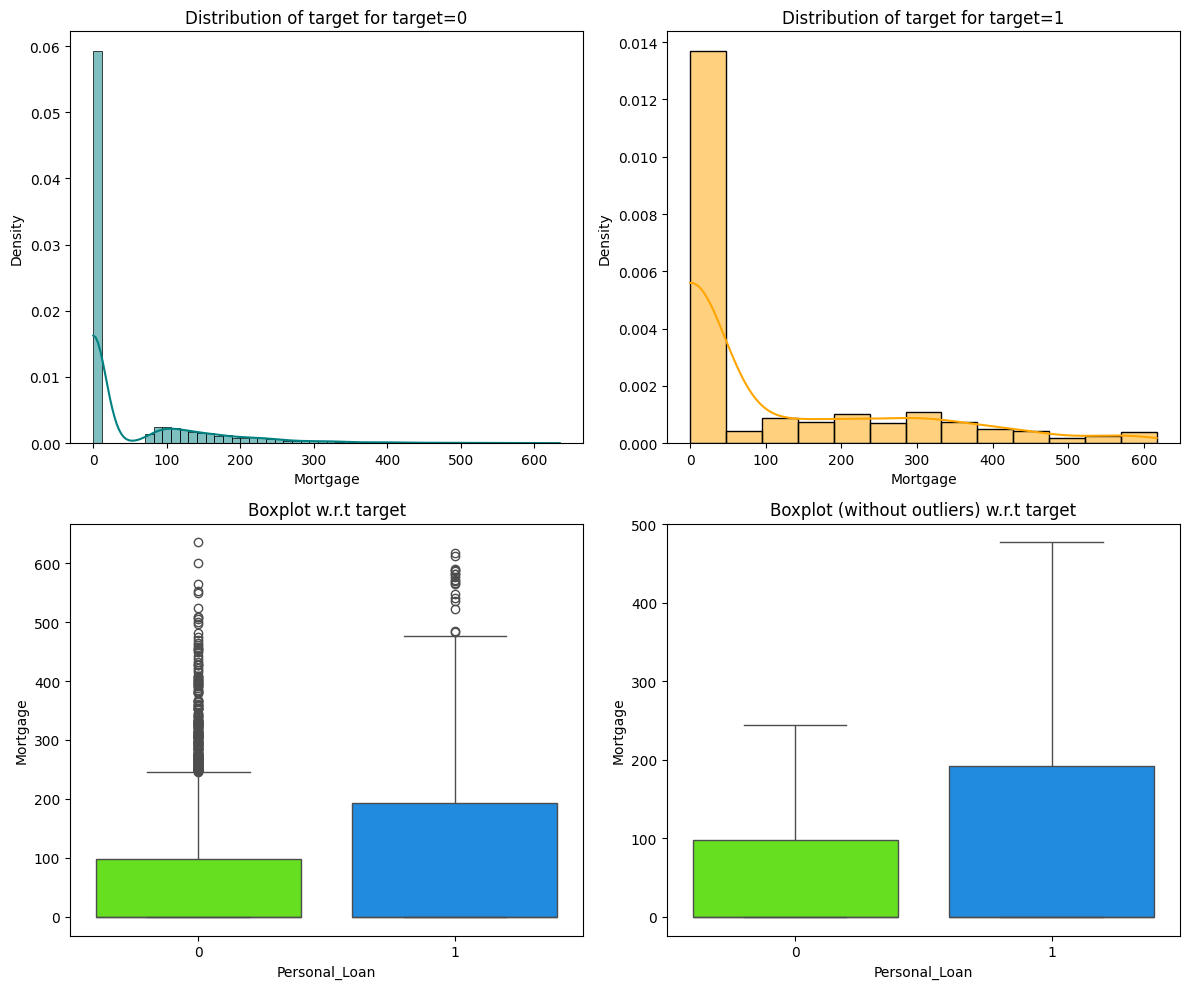

In [49]:
#view relationship between Personal Loan and Mortgage
distribution_plot_wrt_target(df, 'Mortgage', 'Personal_Loan')

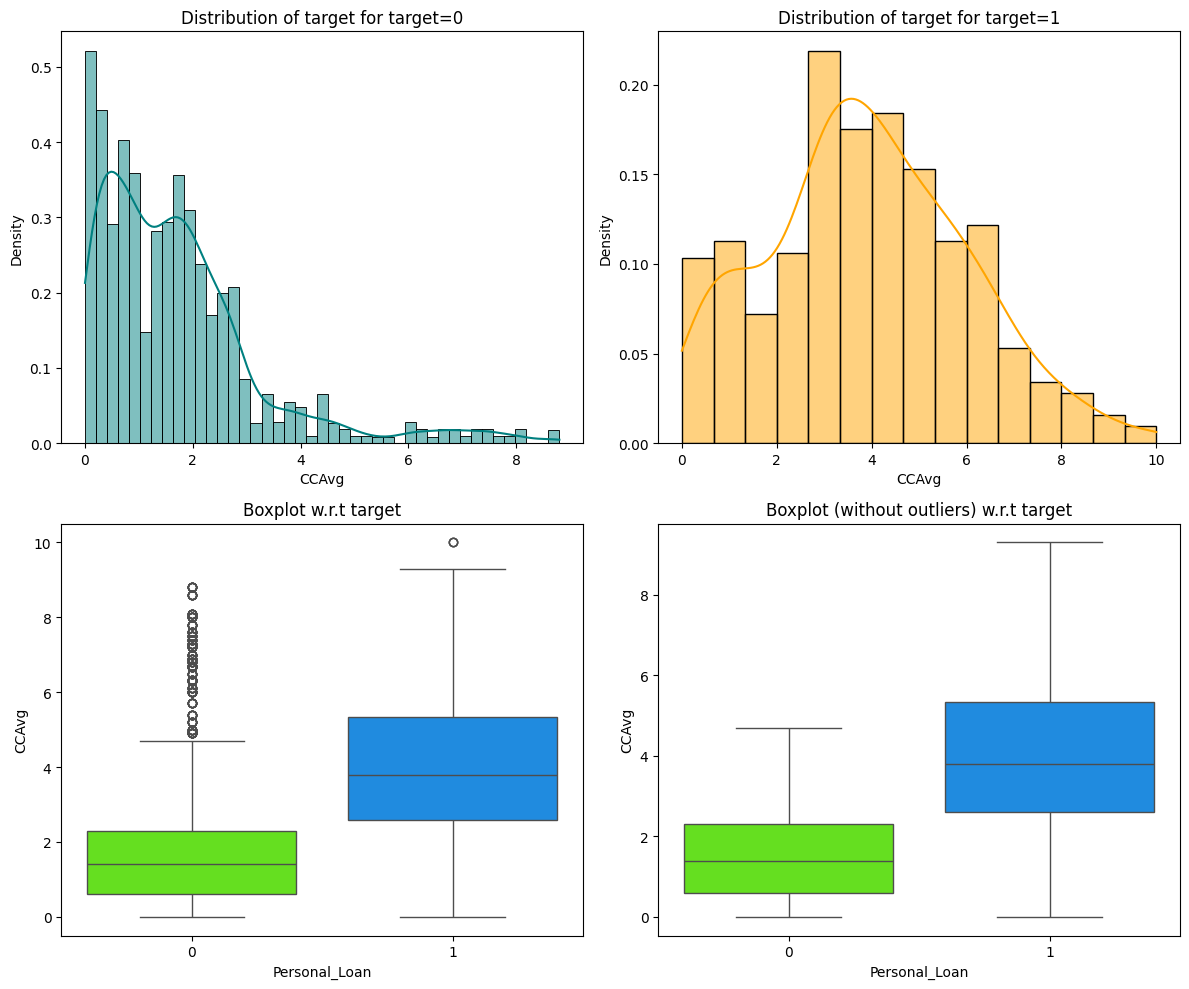

In [50]:
#view relationship between Personal Loan and Credit Card Average
distribution_plot_wrt_target(df, 'CCAvg', 'Personal_Loan')

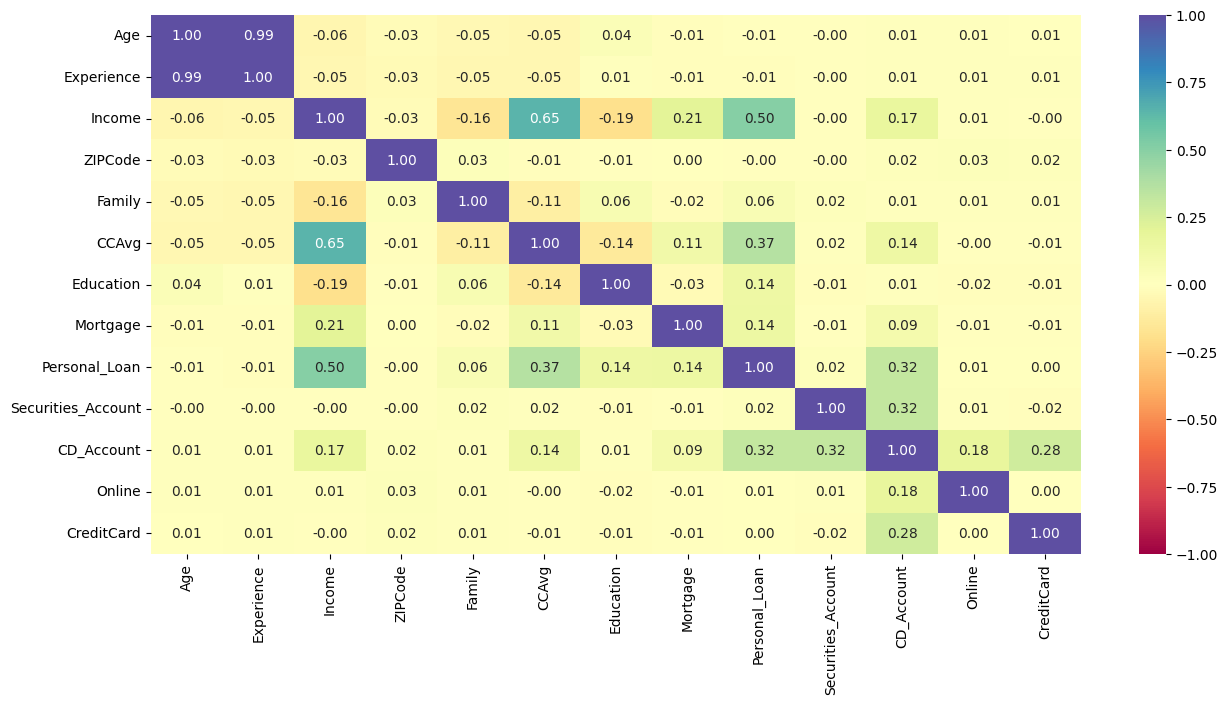

In [51]:
#view correlation between all attributes
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* Income has the strongest correlation with Personal Loan
 * Followed by Credit Card average and CD Accounts

* Age and Experience have almost perfect correlation, so it will beneficial to drop Experience

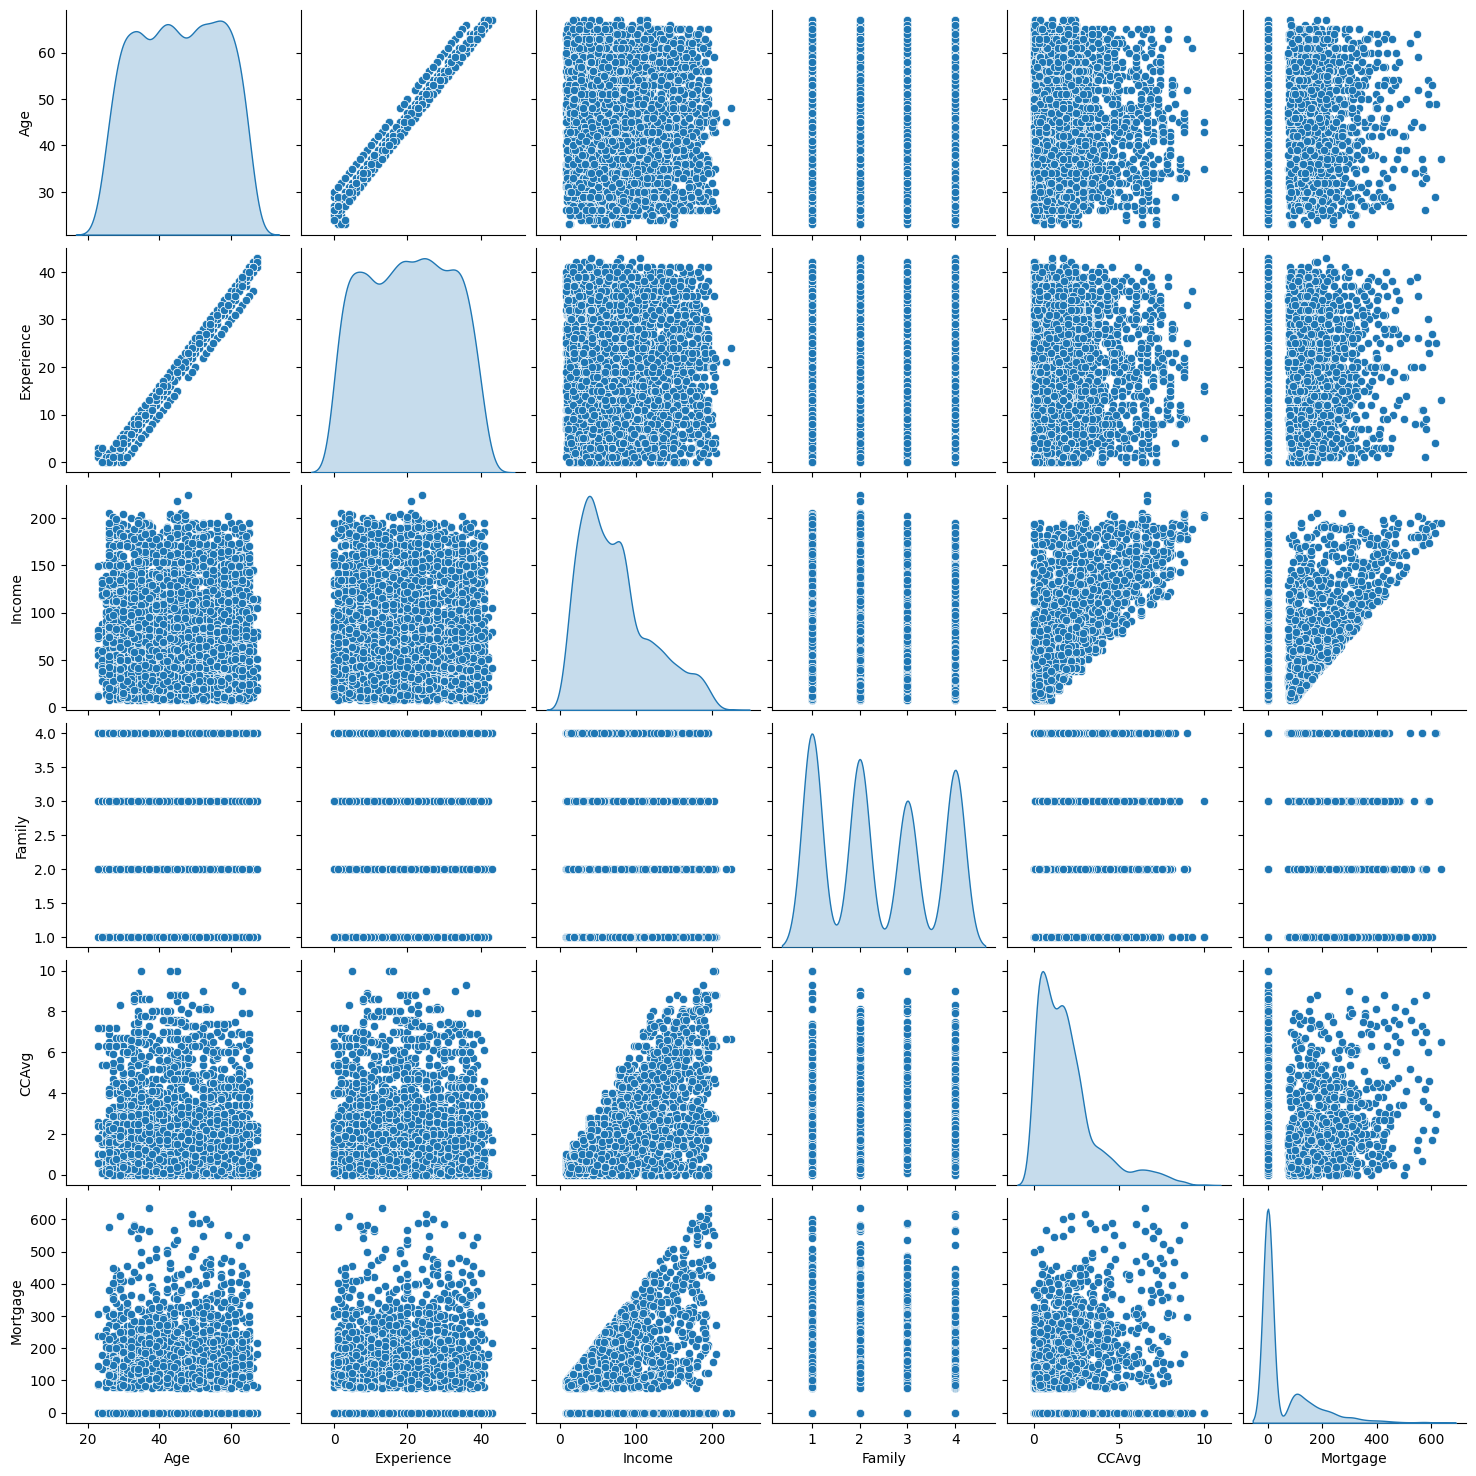

In [52]:
#view correlation between all numeric attributes
sns.pairplot(data=df[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']], diag_kind="kde")
plt.show()

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

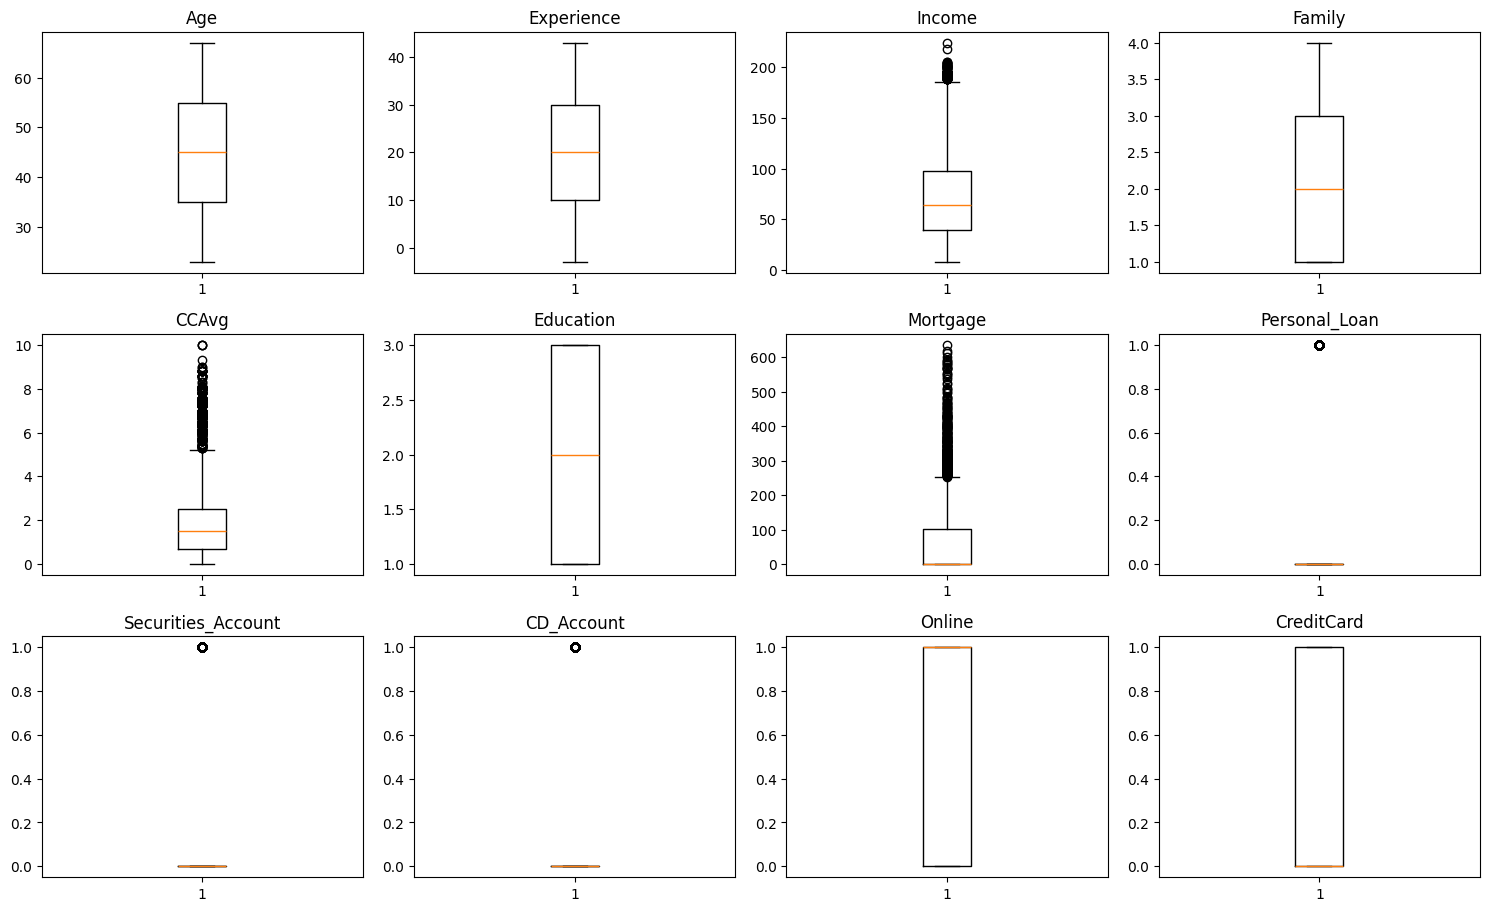

In [53]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

All of the outliers in the dataset appear to be accurate values

In [54]:
X = df.drop(['Personal_Loan', 'Experience'], axis=1)
y = df['Personal_Loan']

X = pd.get_dummies(X, columns = ['ZIPCode', 'Education'], drop_first = True)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))


Shape of Training set :  (3500, 17)
Shape of test set :  (1500, 17)
Percentage of classes in training set:
Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


## Model Building

### Model Evaluation Criterion
### The Model can make wrong predictions as:
1. Marketing a personal loan to a customer who is not in the market for a loan (FP)
2. Excluding a potential customer from the marketing campaign (FN)

### Which case is more important?
* Failing to promote a personal loan campaign to a customer who is more likely to purchase one would lose potential business for the bank

### How to reduce this loss (minimize false negatives)
* Maximizing the model's recall score will help ensure more potential customers are exposed to a personal loan marketing campaign



In [56]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [57]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building

In [58]:
model = DecisionTreeClassifier(criterion = 'gini', random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

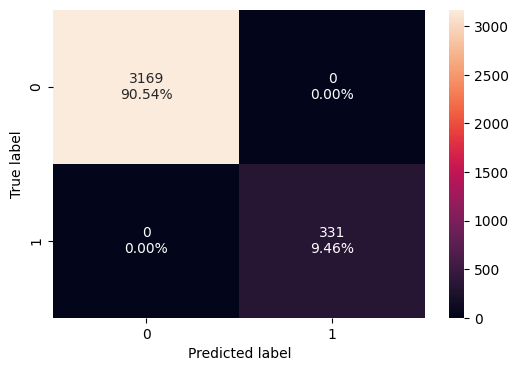

In [59]:
confusion_matrix_sklearn(model, X_train, y_train)

In [60]:
model_train_score = model_performance_classification_sklearn(model, X_train, y_train)
model_train_score

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


* Since there are no hyperparameters set for this model, every data point has been classified
* There are no incorrect predictions on the training data

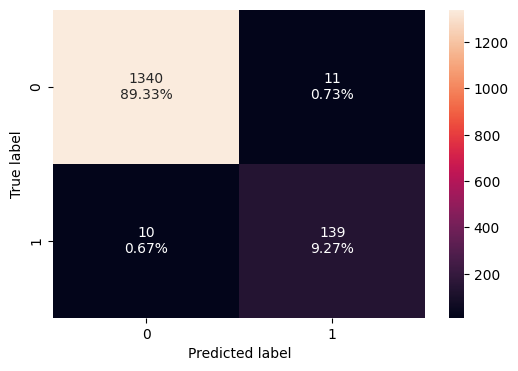

In [61]:
confusion_matrix_sklearn(model, X_test, y_test)

In [62]:
model_test_score = model_performance_classification_sklearn(model, X_test, y_test)
model_test_score

,Accuracy,Recall,Precision,F1
0,0.986,0.932886,0.926667,0.929766


* The metrics for this model are pretty good; however, as this is a full decision tree, it is computationally expensive and may be complex to interpret

In [63]:
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

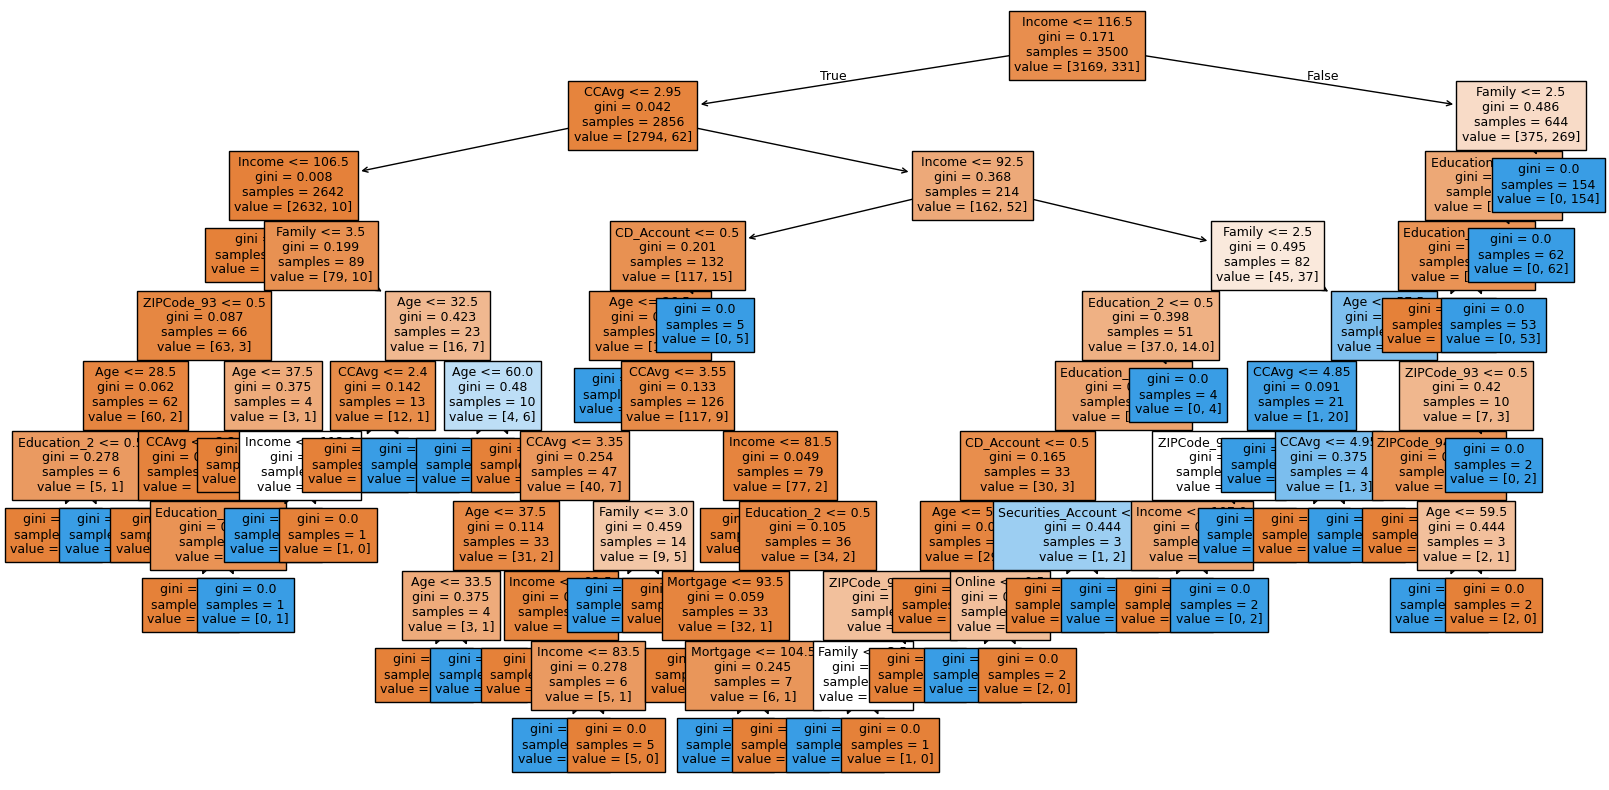

In [64]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [65]:
# Text report showing the rules of a decision tree -
print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_93 >  0.50
|   |   |   |   |   |--- Age <= 37.50

In [66]:
importances = model.feature_importances_
importances

array([0.03315014, 0.30809815, 0.25925535, 0.04879841, 0.00323559,
       0.00222447, 0.01727344, 0.00222447, 0.        , 0.00055612,
       0.        , 0.00468191, 0.00718318, 0.        , 0.        ,
       0.16619226, 0.14712652])

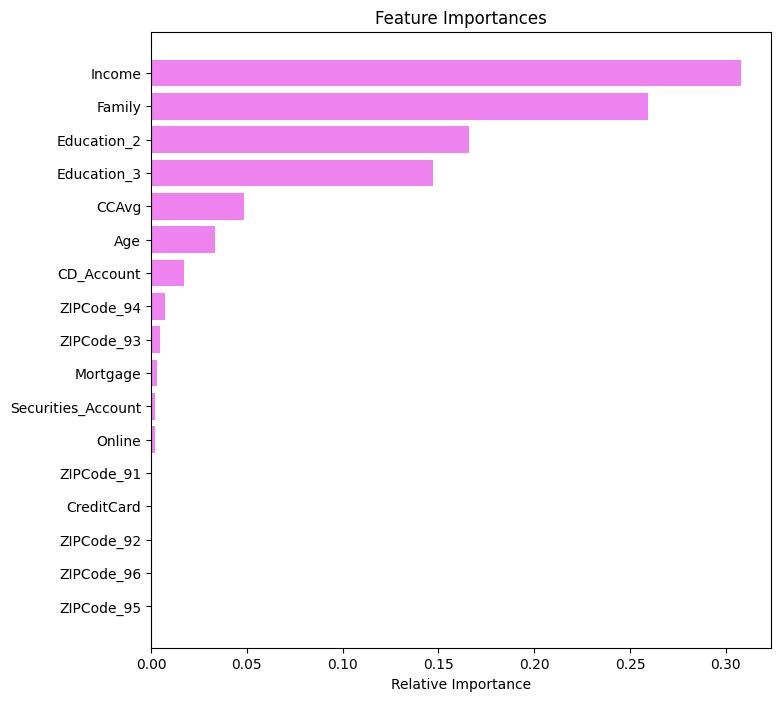

In [67]:
# importance of features in the tree building

importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Income is the most important attribute in this model followed by Family Size and Education level

### Model Performance Improvement

In [68]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    'max_depth': np.arange(2, 16, 2),
    'max_leaf_nodes': [10, 15, 20, 25],
    'min_samples_leaf': [1, 2, 5, 7, 10],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=np.int64(8), max_leaf_nodes=15, random_state=1)

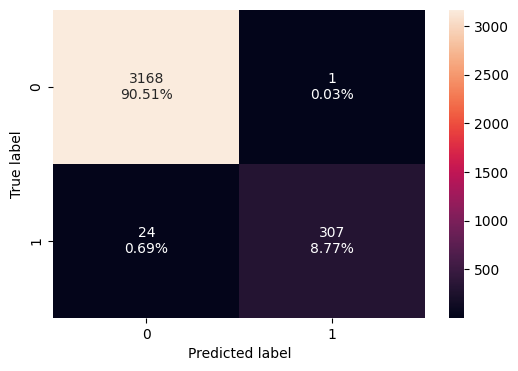

In [69]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [70]:
pre_model_train_score = model_performance_classification_sklearn(estimator, X_train, y_train)
pre_model_train_score

,Accuracy,Recall,Precision,F1
0,0.992857,0.927492,0.996753,0.960876


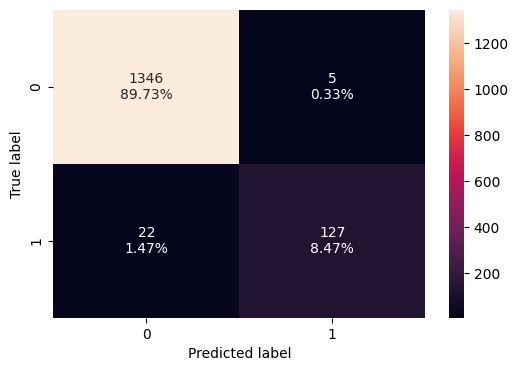

In [71]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [72]:
pre_model_test_score = model_performance_classification_sklearn(estimator, X_test, y_test)
pre_model_test_score

,Accuracy,Recall,Precision,F1
0,0.982,0.852349,0.962121,0.903915


* Based on recall score, this model is slightly worse than the unpruned model

In [73]:
feature_names = list(X_train.columns)
importances = estimator.feature_importances_
indices = np.argsort(importances)

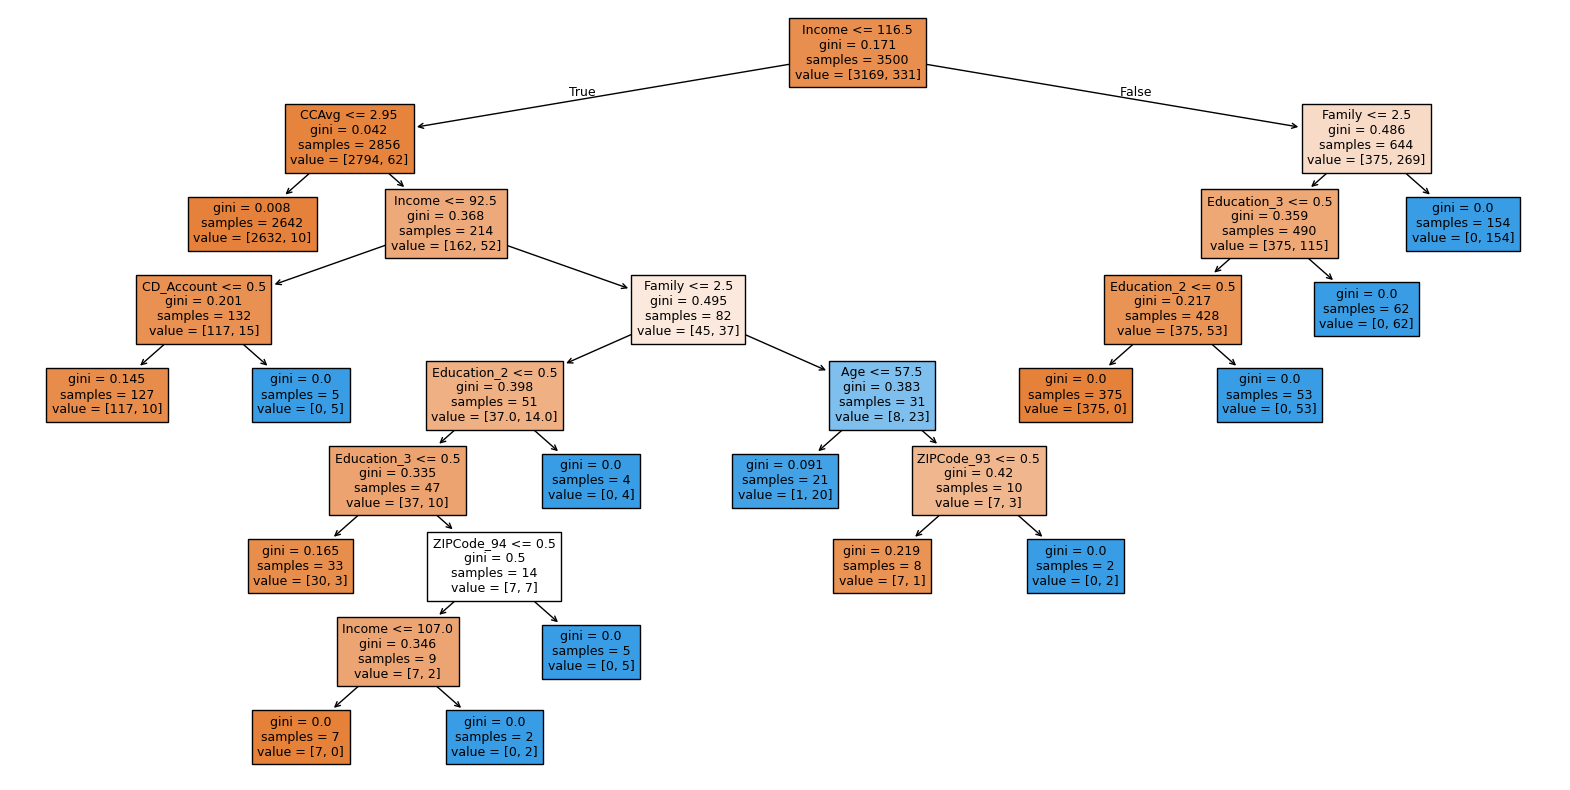

In [74]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [75]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2632.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- weights: [117.00, 10.00] class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |--- Income >  92.50
|   |   |   |--- Family <= 2.50
|   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |   |--- weights: [30.00, 3.00] class: 0
|   |   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |   |--- ZIPCode_94 <= 0.50
|   |   |   |   |   |   |   |--- Income <= 107.00
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Income >  107.00
|   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |   |--- ZIPCode_94 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |   |   |--- Educat

In [76]:
importances = estimator.feature_importances_
importances

array([0.01044726, 0.3251264 , 0.26394607, 0.04104624, 0.        ,
       0.        , 0.0147947 , 0.        , 0.        , 0.        ,
       0.        , 0.00443893, 0.00704592, 0.        , 0.        ,
       0.17654777, 0.15660671])

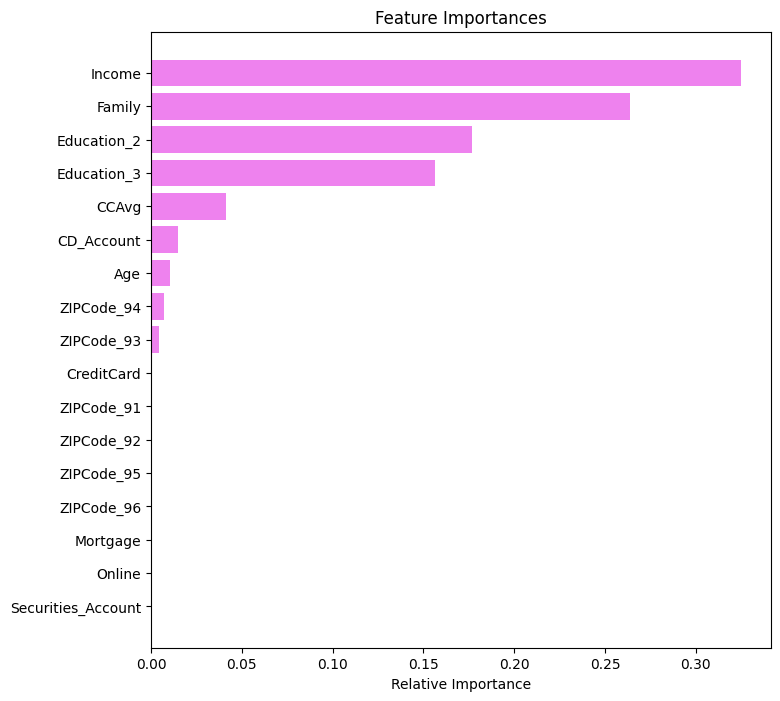

In [77]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Income, Family Size, and Education are the 3 most important attributes in determining Personal Loan for this model

### Post-Pruning Model

In [78]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [79]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000186,0.001114
2,0.000214,0.001542
3,0.000242,0.002750
4,0.000250,0.003250
5,0.000268,0.004324
6,0.000272,0.004868
7,0.000276,0.005420
8,0.000381,0.005801
9,0.000527,0.006329


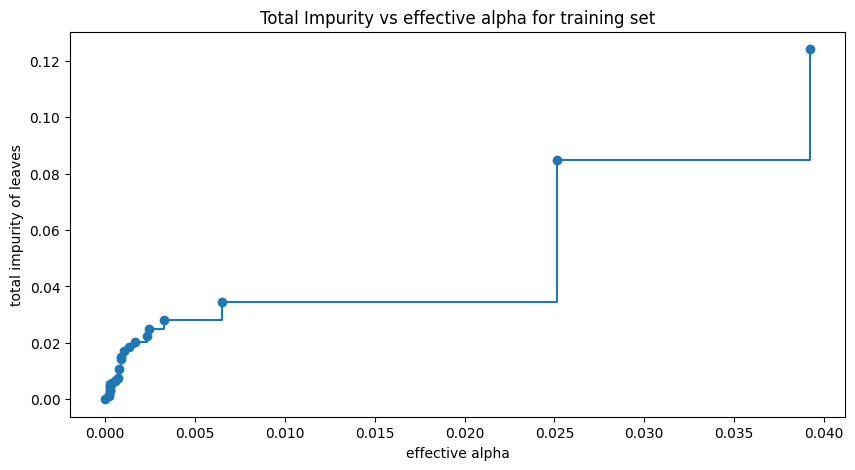

In [80]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [81]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
       random_state=1, ccp_alpha=ccp_alpha
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04708834100596766


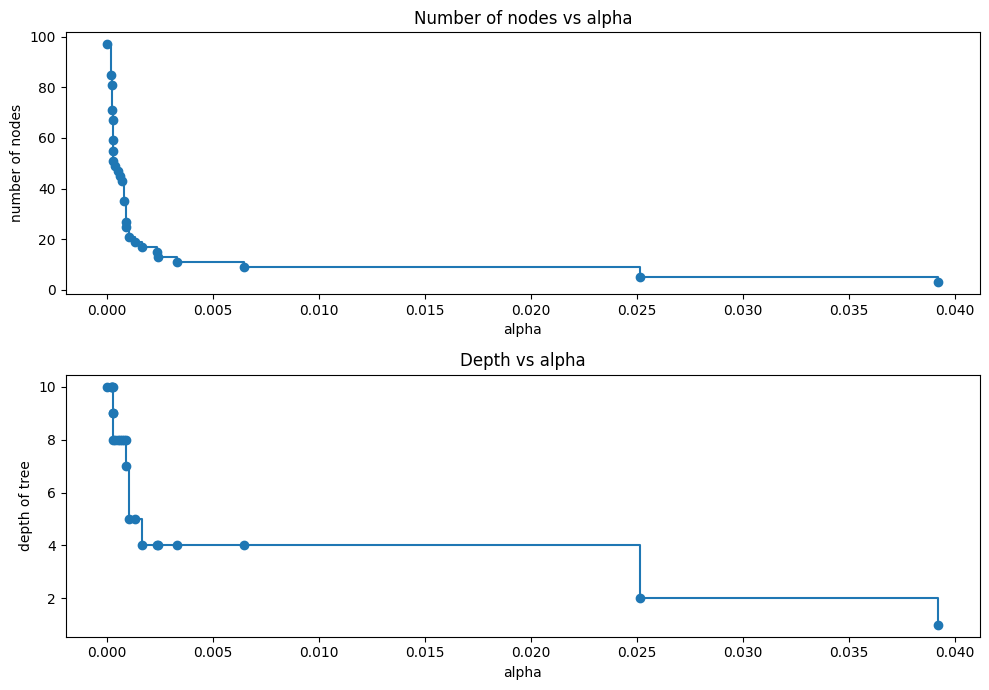

In [82]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [83]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [84]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [85]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

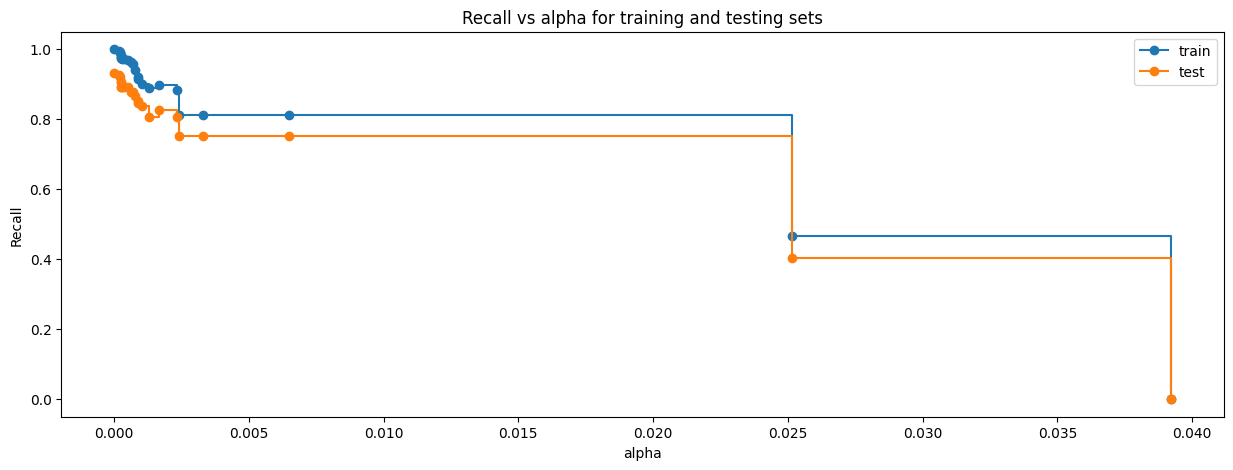

In [86]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [87]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0), random_state=1)


In [88]:
estimator_2 = DecisionTreeClassifier(
    random_state=1, ccp_alpha=0.002407	, class_weight='balanced'
)
estimator_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.002407, class_weight='balanced',
                       random_state=1)

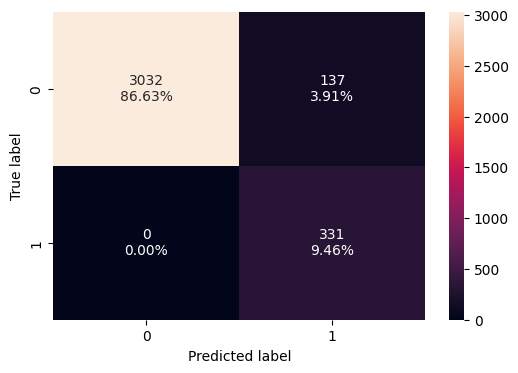

In [89]:
confusion_matrix_sklearn(estimator_2, X_train, y_train)

In [90]:
post_model_train_score = model_performance_classification_sklearn(estimator_2, X_train, y_train)
post_model_train_score

,Accuracy,Recall,Precision,F1
0,0.960857,1.0,0.707265,0.828536


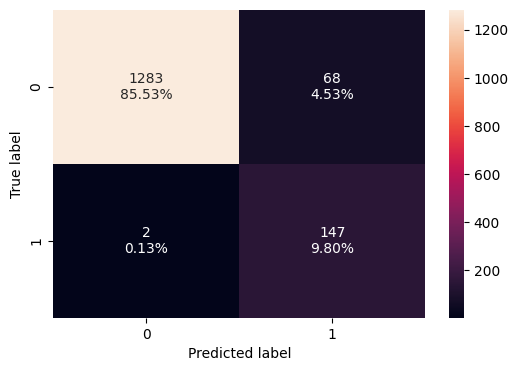

In [91]:
confusion_matrix_sklearn(estimator_2, X_test, y_test)

In [92]:
post_model_test_score = model_performance_classification_sklearn(estimator_2, X_test, y_test)
post_model_test_score

,Accuracy,Recall,Precision,F1
0,0.953333,0.986577,0.683721,0.807692


* This model gives us a very high Recall score on the test data

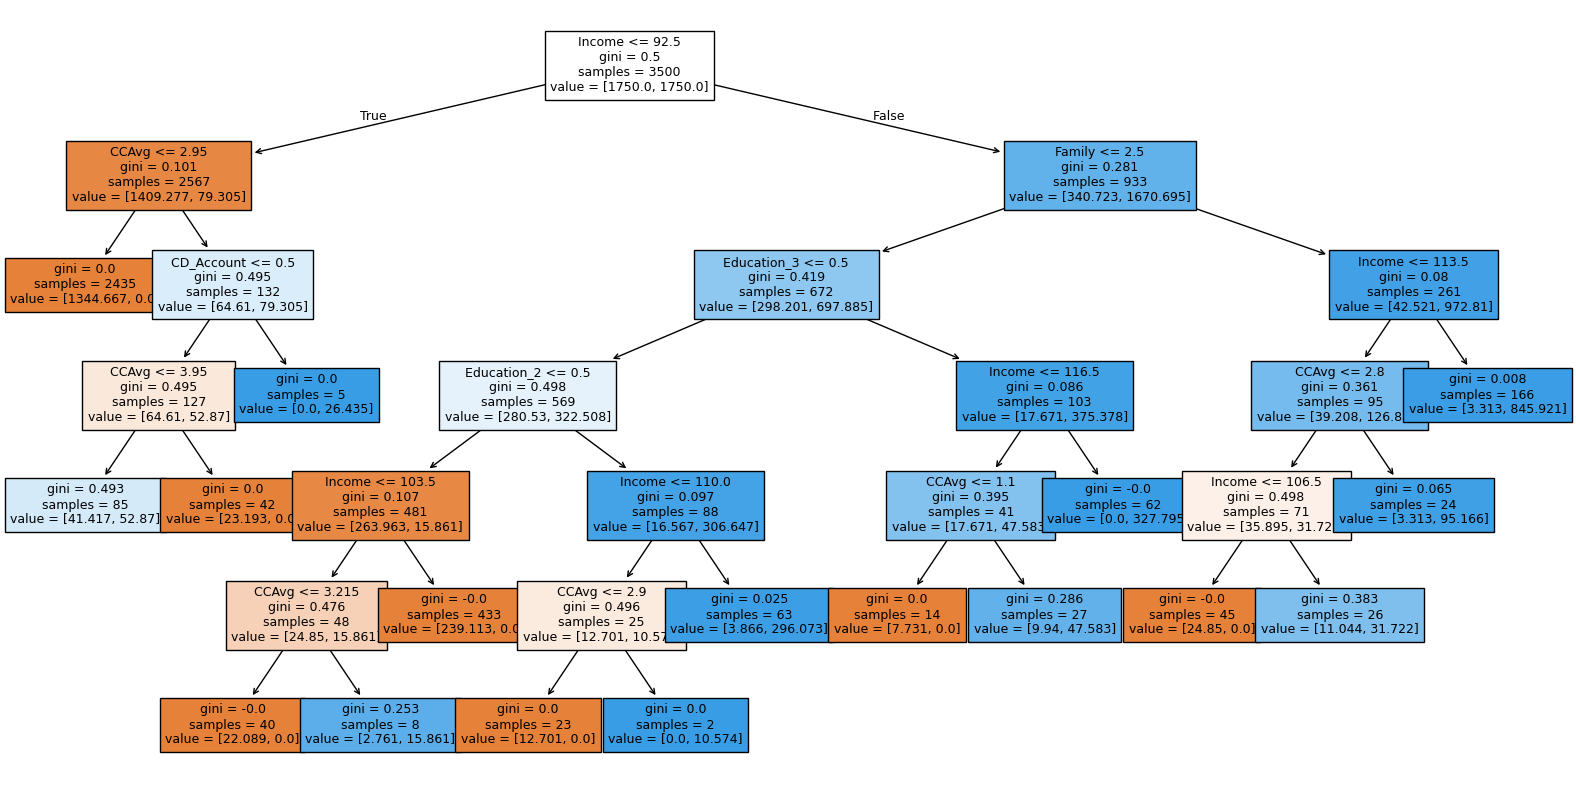

In [93]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    estimator_2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [94]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator_2, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- weights: [41.42, 52.87] class: 1
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [23.19, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [0.00, 26.44] class: 1
|--- Income >  92.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- Income <= 103.50
|   |   |   |   |   |--- CCAvg <= 3.21
|   |   |   |   |   |   |--- weights: [22.09, 0.00] class: 0
|   |   |   |   |   |--- CCAvg >  3.21
|   |   |   |   |   |   |--- weights: [2.76, 15.86] class: 1
|   |   |   |   |--- Income >  103.50
|   |   |   |   |   |--- weights: [239.11, 0.00] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- Income <= 110.00
|   |   |   |   |   |--- CCAvg <= 2.90
|   |   |   |   |   |   |--- weights: [12

In [95]:
importances = estimator_2.feature_importances_
indices = np.argsort(importances)

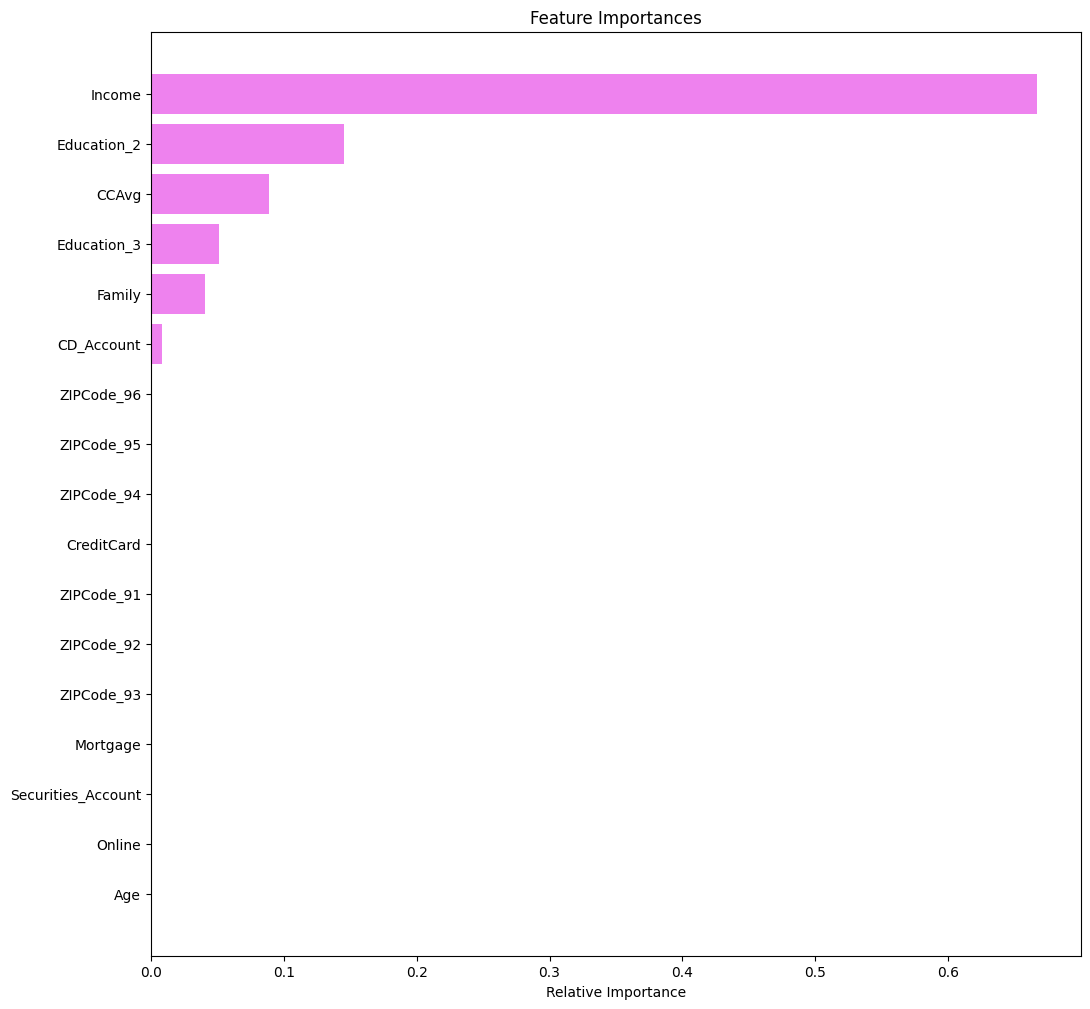

In [96]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In this model Income is the most important attribute then followed by whether the customer recieve a Graduate degree, then Credit Card average

## Model Comparison and Final Model Selection

In [97]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_train_score.T,
        pre_model_train_score.T,
        post_model_train_score.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree with no pruning",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree with no pruning,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.992857,0.960857
Recall,1.0,0.927492,1.000000
Precision,1.0,0.996753,0.707265
F1,1.0,0.960876,0.828536


In [98]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        model_test_score.T,
        pre_model_test_score.T,
        post_model_test_score.T
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree with no pruning",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree with no pruning,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.986000,0.982000,0.953333
Recall,0.932886,0.852349,0.986577
Precision,0.926667,0.962121,0.683721
F1,0.929766,0.903915,0.807692


The Post-Pruned model yields the highest recall score on the testing data. This will help to identify the maximum number of customers who are likely to purchase a personal loan

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?
  * Income is the most influential variable across all models in determining whether a customer might purchase a personal loan
    * In fact, more than 75% of customers that did purchase a personal loan earn more than 100k per year
  * In the unpruned and pre-pruning models, Family size is the second most influential variable
    * Larger family sizes are more likely to purchase a loan; a family size of 3 has the largest density of loans purchased
  

Based on the recall score for the post-pruned model, the criteria for identifying personal loan customers should focus mainly on income (customers that make more than 92.5k per year). Customers that hold a graduate degree and/or have a Credit Card average between 2k-6k are also more likely to purchase a personal loan

___